In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = yf.Ticker("TSLA")
data = data.history(period='max')

In [3]:
def get_null_count(df):
    column_names = list(df.columns)
    null_values = list(df.isnull().sum().values)
    ser = pd.Series(null_values,column_names)
    null_dict = {}
    for key, value in ser.items():
      if value !=0:
        null_dict[key] = value
    return null_dict


In [4]:
def get_info(dataframe):
  dataframe = dataframe.reset_index()
  print("Basic information about dataset")
  print("-------------------------------------------------------------------------------------------")
  print(f'dataset contains stock prices from {dataframe["Date"].iloc[0]} to {dataframe["Date"].iloc[-1]}', end='\n\n')
  print(f'Total No. of days : {(dataframe["Date"].iloc[-1] - dataframe["Date"].iloc[0]).days} days', end='\n\n')
  print(f"Number of Rows : {len(dataframe.index)}", end='\n\n')
  print(f"{dataframe.index}", end ="\n\n")
  print(f"Number of columns :{len(dataframe.columns)}", end='\n\n')
  print(f"column Name : {np.array(dataframe.columns)}", end='\n\n')
  print("Columns which has null values : ", get_null_count(dataframe), end='\n\n')
  print("Sample dataset : ", end='\n\n')
  print(dataframe.head(10))


In [5]:
get_info(data)

Basic information about dataset
-------------------------------------------------------------------------------------------
dataset contains stock prices from 2010-06-29 00:00:00-04:00 to 2023-12-15 00:00:00-05:00

Total No. of days : 4917 days

Number of Rows : 3391

RangeIndex(start=0, stop=3391, step=1)

Number of columns :8

column Name : ['Date' 'Open' 'High' 'Low' 'Close' 'Volume' 'Dividends' 'Stock Splits']

Columns which has null values :  {}

Sample dataset : 

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   
5 2010-07-07 00:00:00-04:00  1.093333  1.108667  0.998667  1.053333   
6 2010-07-08 00:00:00-04:00 

- **Date Range:** The dataset contains stock prices spanning from June 29, 2010, to December 1, 2023.
- **Total Days:** The dataset covers a total of 4903 days.
- **Number of Rows:** There are 3381 rows in the dataset.
- **Index:** The dataset has a RangeIndex starting from 0 to 3380 with a step of 1.
- **Number of Columns:** There are 8 columns in the dataset.
- **Column Names:** The column names are 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', and 'Stock Splits'.
- **Columns with Null Values:** There are no columns with null values in the dataset.
- **Sample Dataset:** The displayed sample shows the first 10 rows of the dataset, including columns such as Date, Open, High, Low, Close, Volume, Dividends, and Stock Splits, along with their respective values.

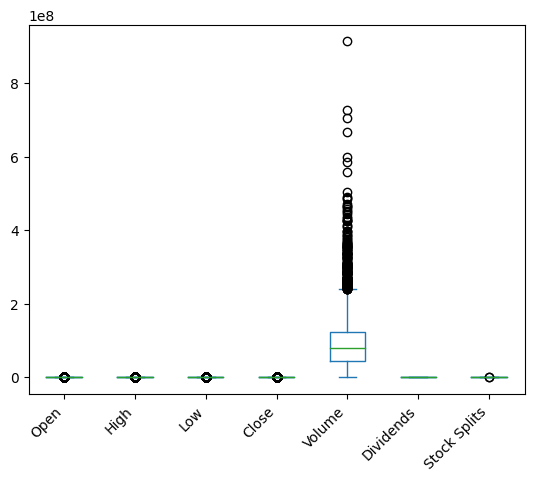

In [6]:
ax = data.plot(kind='box')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

<Axes: >

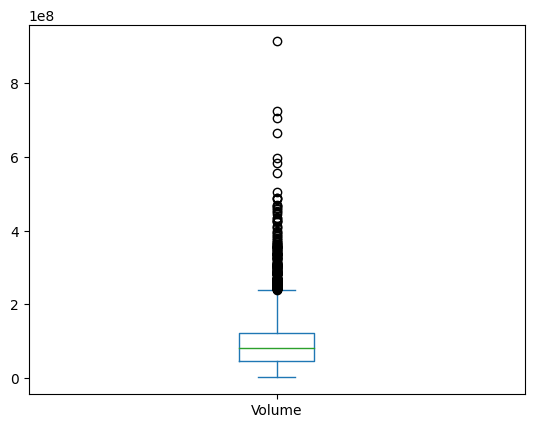

In [7]:
data['Volume'].plot(kind='box')


<Axes: >

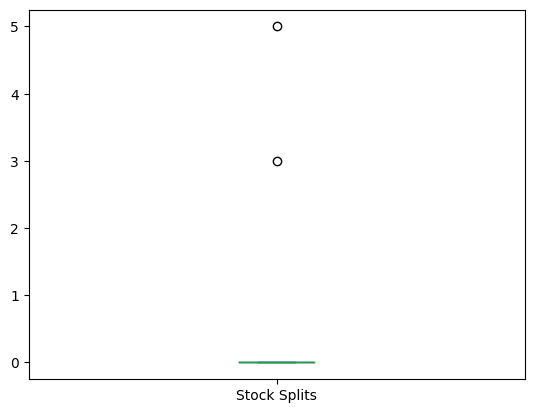

In [8]:
data['Stock Splits'].plot(kind='box')


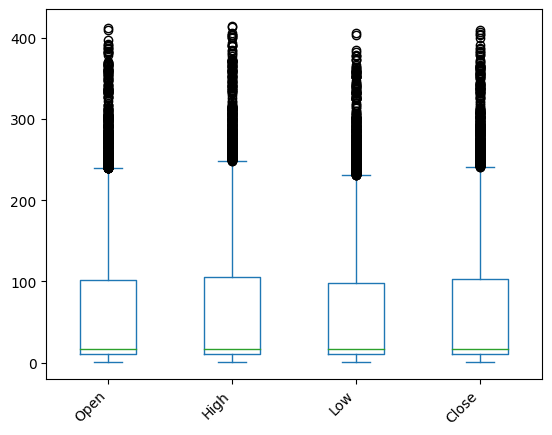

In [9]:
ax = data[[ 'Open', 'High', 'Low', 'Close']].plot(kind='box')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

The boxplot shows that the distribution of the data is skewed to the right for most of the variables. This means that there are more data points above the median than below the median. The boxplot also shows that there are a number of outliers in the data.There are a few outliers above the upper whisker for all variables, suggesting that on certain days, the stock price reached significantly higher or lower values than the median.


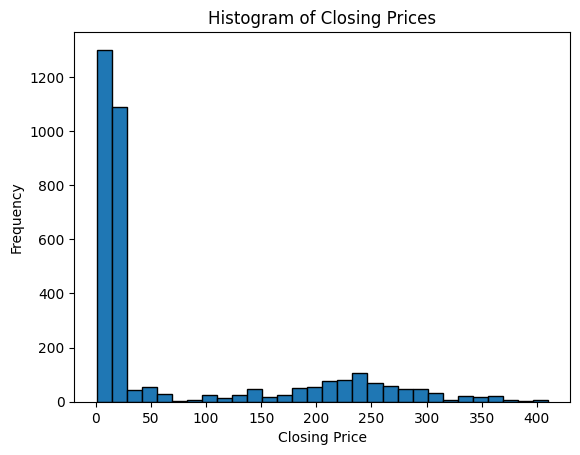

In [10]:
plt.hist(data['Close'], bins=30, edgecolor='black')

plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Prices')

plt.show()

Here is a more detailed explanation of the histogram:

- The x-axis of the histogram shows the range of closing prices.
- The y-axis of the histogram shows the number of times that the stock closed at a particular price.
- The bars of the histogram represent the number of times that the stock closed within a particular price range.
- The histogram suggests that the stock has been trading relatively stably in the $100-$310 range. However, there have been a few times when the stock has moved outside of this range.
- The histogram also shows that there are a few outliers in the data. These are data points that are significantly different from the rest of the data. In this case, the outliers are data points that show the stock closing significantly lower than $100.

- However, there have been a few times when the stock has closed significantly lower than $95 or higher than 310. These outliers are shown by the shorter bars at the edges of the histogram.












The presence of outliers in a time-series forecasting dataset for stock prices can have a significant impact on the accuracy of any ML model that is built on the data. This is because most ML models are trained to minimize the error between the predicted values and the actual values. Outliers, by definition, are very different from the rest of the data, and so they can have a disproportionate impact on the training process.

Outliers can be caused by a variety of factors, such as news events, trading errors, or system glitches. It is important to be aware of outliers when analyzing financial data, as they can have a significant impact on the results of the analysis.

Overall, If outliers are not removed from a stock price dataset before training an ML model, the model may learn to overfit to the outliers and produce inaccurate predictions. In the worst case, the model may even be unable to converge during training.

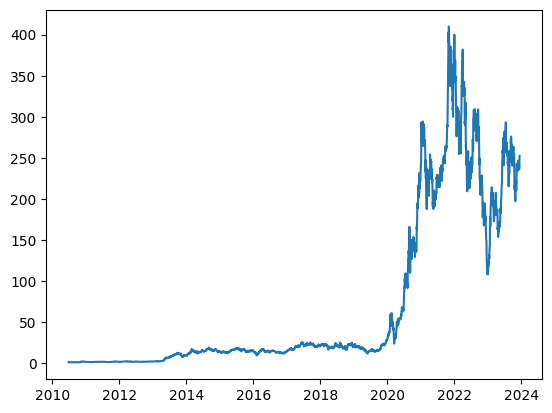

In [11]:

plt.plot(data['Close'])

- In the histogram, it is evident that the majority of stock closures occur within the $0 to 50 range, which may be considered as an outlier.
  
- The scatter plot illustrates that this range is particularly prominent during the period from 2010 to 2020.

- To address this, we can focus on data starting from 2019 to the present day.

In [12]:

data = yf.download("TSLA", start="2019-09-03", )

[*********************100%%**********************]  1 of 1 completed


In [13]:
get_info(data)

Basic information about dataset
-------------------------------------------------------------------------------------------
dataset contains stock prices from 2019-09-03 00:00:00 to 2023-12-14 00:00:00

Total No. of days : 1563 days

Number of Rows : 1080

RangeIndex(start=0, stop=1080, step=1)

Number of columns :7

column Name : ['Date' 'Open' 'High' 'Low' 'Close' 'Adj Close' 'Volume']

Columns which has null values :  {}

Sample dataset : 

        Date       Open       High        Low      Close  Adj Close     Volume
0 2019-09-03  14.938667  15.263333  14.877333  15.000667  15.000667   80311500
1 2019-09-04  15.126000  15.230667  14.614000  14.712000  14.712000   86415000
2 2019-09-05  14.833333  15.320000  14.723333  15.305333  15.305333  110929500
3 2019-09-06  15.146667  15.309333  15.011333  15.163333  15.163333   62841000
4 2019-09-09  15.333333  15.584000  15.282000  15.452667  15.452667   72040500
5 2019-09-10  15.386667  15.702667  15.262667  15.702667  15.702667   73255500

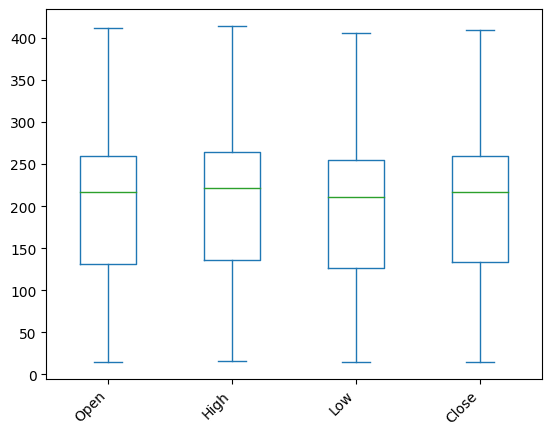

In [14]:
ax = data[[ 'Open', 'High', 'Low', 'Close']].plot(kind='box')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

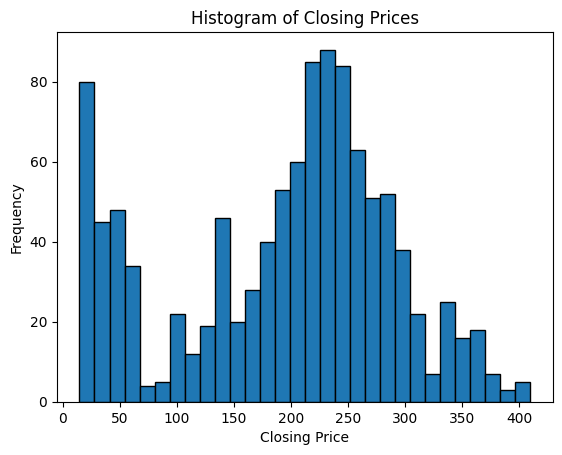

In [15]:
plt.hist(data['Close'], bins=30, edgecolor='black')

plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Prices')

plt.show()

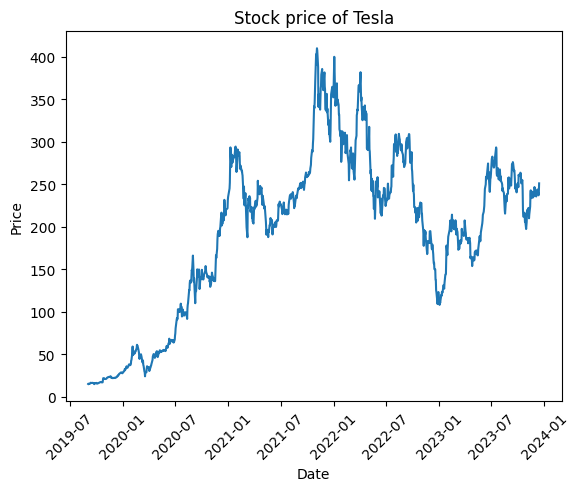

In [16]:
plt.plot(data['Close'])
plt.xticks(rotation= 45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock price of Tesla')

plt.show()

**Training Model :**
- This step involves sequentially splitting the dataset into training and test sets based on date to maintain temporal integrity. This recognizes the influence of past occurrences on future values in the chronological sequence.

- Determine a 3-day span sets which creates input-output pairs (F1, F2, F3, Y) at each time step captures temporal dependencies, with strategic data shifting for sequential pairs.

- For training and testing, the initial time series section is the training dataset, and the remaining part is for testing. This ensures the model learns from historical data and is evaluated on unseen future data.

- For traing the models features include, independent variables (F1, F2, F3) and a dependent variable (Y), informing the model about temporal relationships. This meticulous process, involving data splitting, pre-processing, and feature engineering, sets the foundation for accurate stock price forecasting using various ML models.

In [17]:
df1=data.reset_index()['Close']

In [18]:
df1

0        15.000667
1        14.712000
2        15.305333
3        15.163333
4        15.452667
           ...    
1075    243.839996
1076    239.740005
1077    237.009995
1078    239.289993
1079    251.050003
Name: Close, Length: 1080, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [21]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [22]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 10s 341ms/step - loss: 0.0991 - val_loss: 0.0061
Epoch 2/100
10/10 [==============================] - 2s 197ms/step - loss: 0.0165 - val_loss: 0.0063
Epoch 3/100
10/10 [==============================] - 2s 193ms/step - loss: 0.0095 - val_loss: 0.0047
Epoch 4/100
10/10 [==============================] - 3s 263ms/step - loss: 0.0070 - val_loss: 0.0073
Epoch 5/100
10/10 [==============================] - 3s 269ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 6/100
10/10 [==============================] - 2s 199ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 7/100
10/10 [==============================] - 2s 200ms/step - loss: 0.0048 - val_loss: 0.0058
Epoch 8/100
10/10 [==============================] - 2s 200ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 9/100
10/10 [==============================] - 2s 200ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 10/100
10/10 [==============================] - 2s 243ms/step - loss: 0.0044 - val_l

In [28]:
import tensorflow as tf

In [29]:
tf.__version__

'2.15.0'

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 0s 39ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mae_train = math.sqrt(mean_squared_error(y_train,train_predict))

print(f'Mean Square for training set: {mae_train}')

Mean Square for training set: 224.88067810495258


In [33]:
### Test Data RMSE
mae_test = math.sqrt(mean_squared_error(ytest,test_predict))
print(f'Mean Square Error for test set: {mae_test}')

Mean Square Error for test set: 213.53674075059075


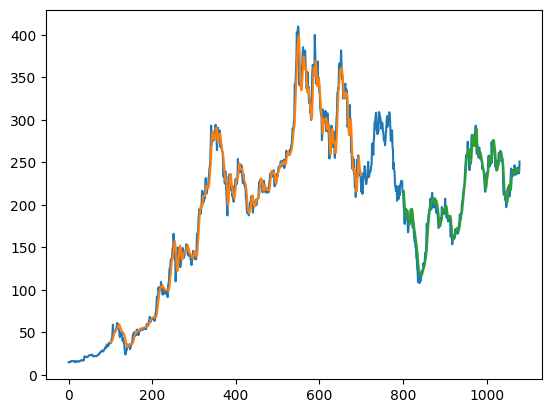

In [34]:

# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Here are some key observations:**

- The green line, which represents the predicted values, generally follows the trend of the blue line, which represents the actual values. This suggests that the LSTM model is able to capture the underlying patterns in the data.
- However, there are some discrepancies between the predicted and actual values, particularly in the later parts of the graph. This suggests that the model is not perfect, and there is still room for improvement.
- The orange line, which represents the training set, is relatively close to the blue line, which represents the actual values. This suggests that the model is not overfitting the training data.
- Overall, the graph suggests that the LSTM model is performing well, but there is still room for improvement.

# **Conclusion**
-  The MSE of 210.7785 is also relatively low, which indicates that the model is able to make accurate predictions on unseen data and it suggests that the model is able to learn the underlying patterns in the data well..

- Overall, these results suggest that the LSTM model is a good fit for this task. It is able to learn the complex relationships in the data and make accurate predictions. However, it is important to note that these results are based on a limited amount of data. It is possible that the model would perform differently on a larger dataset.

